# ECG Image Classification using Convolutional Neural Networks (CNN)


## Mounting Google Drive in Google Colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ECG Image Classification using Convolutional Neural Network (CNN)


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to load images from folders
def load_data(path, label_dict):
    data = []
    labels = []
    for category, label_value in label_dict.items():
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                image = cv2.resize(image, (224, 224))  # Resize
                data.append(image)
                labels.append(label_value)
            except Exception as e:
                print(f"Error loading image: {img_path} - {e}")
    return np.array(data), np.array(labels)

# Define class labels
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3,
    'nonecg_images': 4  # Non-ECG images
}

# Load the dataset
path = '/content/drive/MyDrive/train/'  # Update path if needed
data, labels = load_data(path, label_dict)

# Normalize data
data = data.astype('float32') / 255.0

# Convert labels to categorical (5 classes: 4 ECG + 1 Non-ECG)
labels = keras.utils.to_categorical(labels, 5)

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

# Save model
model.save("ecg_classifier.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.4303 - loss: 2.8147 - val_accuracy: 0.6571 - val_loss: 0.7107
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.5913 - loss: 0.8180 - val_accuracy: 0.6500 - val_loss: 0.7095
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.6114 - loss: 0.8069 - val_accuracy: 0.6179 - val_loss: 0.7243
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.6104 - loss: 0.8174 - val_accuracy: 0.6571 - val_loss: 0.6824
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6433 - loss: 0.7781 - val_accuracy: 0.7357 - val_loss: 0.6383
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.6880 - loss: 0.6960 - val_accuracy: 0.7500 - val_loss: 0.6039
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.7779 - loss: 0.5477 - val_accuracy: 0.8679 - val_loss: 0.4369
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.8416 - loss: 0.4494 - val_accuracy: 0.8071 - v

Test Accuracy: 0.9714285731315613


## Saving the Trained ECG Classification Model


In [ ]:
import os

# Ensure the directory exists before saving
os.makedirs("/content/drive/MyDrive/models_fyp_21", exist_ok=True)

# Save model
model.save("/content/drive/MyDrive/models_fyp_21/ecg_classifier.h5")
print("Model saved successfully as ecg_classifier.h5")


Model saved successfully as ecg_classifier.h5


## Model Evaluation: Classification Report and Confusion Matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
import numpy as np

# Load the trained model
model = keras.models.load_model("ecg_classifier.h5")

# Predict on test data
predictions = model.predict(test_data)

# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=label_dict.keys())
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)



11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 945ms/step
Classification Report:
                                                                   precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      0.96      0.98        45
     ECG Images of Patient that have History of MI (172x12=2064)       0.97      0.93      0.95        40
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.93      0.96      0.95        54
                          Normal Person ECG Images (284x12=3408)       0.94      0.95      0.94        62
                                                   nonecg_images       0.99      1.00      1.00       149

                                                        accuracy                           0.97       350
                                                       macro avg       0.97      0.96      0.96       350
                                                    weighted avg       0.97      0.9

## Displaying the Output Shape of the Model


In [ ]:
print(model.output_shape)


(None, 5)


## Model Evaluation: Confusion Matrix, Classification Report, and Training Performance


11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 978ms/step


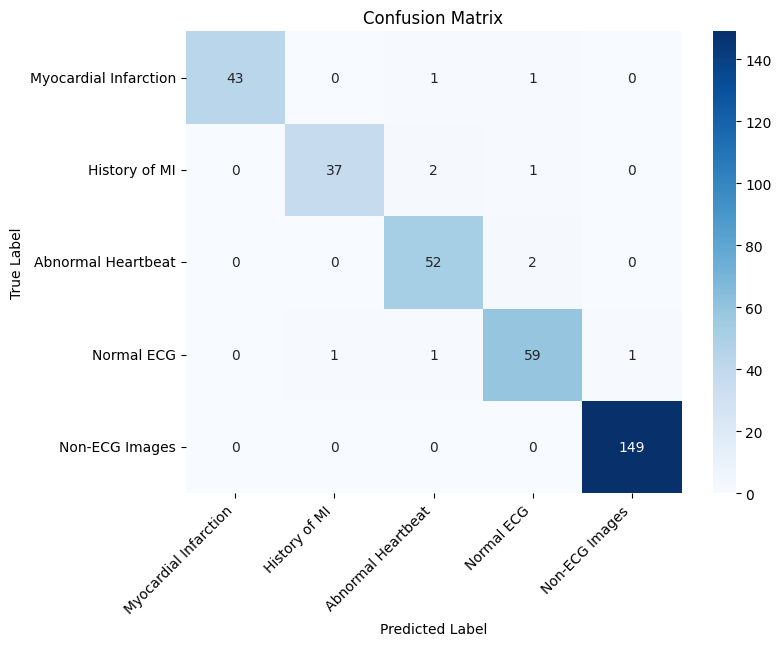

Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction       1.00      0.96      0.98        45
        History of MI       0.97      0.93      0.95        40
   Abnormal Heartbeat       0.93      0.96      0.95        54
           Normal ECG       0.94      0.95      0.94        62
       Non-ECG Images       0.99      1.00      1.00       149

             accuracy                           0.97       350
            macro avg       0.97      0.96      0.96       350
         weighted avg       0.97      0.97      0.97       350



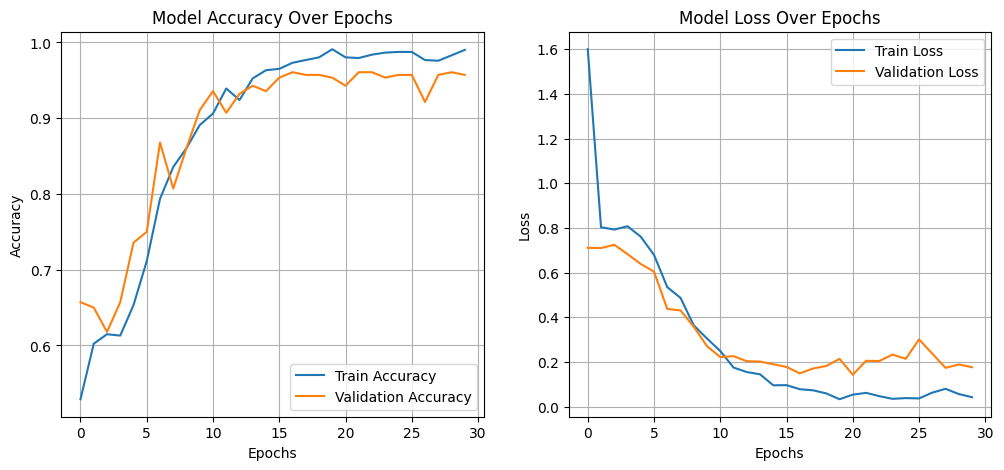

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Load the trained model
model = tf.keras.models.load_model("ecg_classifier.h5")

# Make predictions on the test data
y_pred = model.predict(test_data)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Define class labels
class_labels = [
    "Myocardial Infarction",
    "History of MI",
    "Abnormal Heartbeat",
    "Normal ECG",
    "Non-ECG Images"
]

# 🎯 1. Confusion Matrix (Heatmap)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

# 🎯 2. Accuracy & Loss Over Epochs (Assuming 'history' from training)
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid()

plt.show()


 ## Model Evaluation: Confusion Matrix, Classification Report, and Training Performance


In [ ]:
pip install gradio

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load model
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/models_fyp_21/ecg_classifier.h5"
)

# Class labels
class_names = [
    "Myocardial Infarction",
    "History of MI",
    "Abnormal Heartbeat",
    "Normal ECG",
    "Non-ECG Images"
]

def medical_details(label):
    data = {
        "Myocardial Infarction": {
            "risk": "HIGH",
            "color": "#d32f2f",
            "meaning": "Indicates possible heart muscle damage due to blocked blood flow.",
            "tests": ["Troponin Blood Test", "Repeat ECG", "Coronary Angiography"],
            "monitor": "Continuous cardiac monitoring",
            "lifestyle": "Strict bed rest, avoid stress, immediate hospital care",
            "emergency": "CALL EMERGENCY SERVICES IMMEDIATELY"
        },
        "History of MI": {
            "risk": "HIGH",
            "color": "#f57c00",
            "meaning": "Shows previous heart attack changes on ECG.",
            "tests": ["Echocardiogram", "Stress Test"],
            "monitor": "Monthly cardiology follow-up",
            "lifestyle": "Heart-friendly diet, medication adherence",
            "emergency": "Seek help if chest pain or breathlessness occurs"
        },
        "Abnormal Heartbeat": {
            "risk": "MEDIUM",
            "color": "#fbc02d",
            "meaning": "Irregular heart rhythm detected.",
            "tests": ["Holter ECG", "Electrolyte Test"],
            "monitor": "Weekly or symptom-based monitoring",
            "lifestyle": "Reduce caffeine, improve sleep",
            "emergency": "Seek help if dizziness or fainting occurs"
        },
        "Normal ECG": {
            "risk": "LOW",
            "color": "#388e3c",
            "meaning": "Heart rhythm and electrical activity appear normal.",
            "tests": ["Routine ECG (optional)"],
            "monitor": "Once a year",
            "lifestyle": "Regular exercise, balanced diet",
            "emergency": "No emergency unless symptoms appear"
        },
        "Non-ECG Images": {
            "risk": "UNKNOWN",
            "color": "gray",
            "meaning": "Uploaded image does not appear to be an ECG.",
            "tests": ["Upload a valid ECG image"],
            "monitor": "N/A",
            "lifestyle": "N/A",
            "emergency": "N/A"
        }
    }
    return data[label]

def predict_ecg(image):
    img = cv2.resize(image, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0]
    idx = np.argmax(prediction)
    label = class_names[idx]
    confidence = prediction[idx] * 100

    info = medical_details(label)

    probs = "".join(
        [
            f"<li>{class_names[i]}: {prediction[i]*100:.2f}%</li>"
            for i in range(len(class_names))
        ]
    )

    tests = "".join(
        [f"<li>{t}</li>" for t in info["tests"]]
    )

    html = f"""
    <div style="font-family:Arial; padding:20px; color:#e0e0e0; background:#121212;">

        <h2 style="color:{info['color']};">🫀 ECG Medical Report</h2>

        <div style="
            border-left:6px solid {info['color']};
            padding:15px;
            background:#1e1e1e;
            color:#e0e0e0;
            border-radius:8px;
        ">
            <h3 style="color:#ffffff;">{label}</h3>
            <p><b>Confidence:</b> {confidence:.2f}%</p>
            <p>
                <b>Risk Level:</b>
                <span style="color:{info['color']}; font-weight:bold;">
                    {info['risk']}
                </span>
            </p>
            <p><b>Clinical Interpretation:</b> {info['meaning']}</p>
        </div>

        <h3 style="color:#90caf9;">📊 Probability Distribution</h3>
        <ul>{probs}</ul>

        <h3 style="color:#81c784;">🩺 Recommended Medical Tests</h3>
        <ul>{tests}</ul>

        <h3 style="color:#ffcc80;">🧘 Lifestyle & Care Advice</h3>
        <p>{info['lifestyle']}</p>

        <h3 style="color:#ce93d8;">⏱️ Monitoring Frequency</h3>
        <p>{info['monitor']}</p>

        <h3 style="color:#ef5350;">🚨 Emergency Guidance</h3>
        <p><b>{info['emergency']}</b></p>

        <p style="font-size:12px; color:#9e9e9e;">
            ⚠️ Educational use only. Not a replacement for professional medical diagnosis.
        </p>
    </div>
    """

    return html

iface = gr.Interface(
    fn=predict_ecg,
    inputs=gr.Image(type="numpy", label="Upload ECG Image"),
    outputs=gr.HTML(label="ECG Medical Dashboard"),
    title="ECG Image Classifier – Advanced Medical Dashboard",
    description="AI-based ECG analysis with clinical interpretation, risk assessment, and recommendations.",
    clear_btn="Clear",
    allow_flagging="never"
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b9f5589939012c96d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
